In [1]:
#import all the librariees
import numpy as np
import pandas as pd
import scipy.stats as stats
import matplotlib.pyplot as plt

In [2]:
#import/load the boston data
from sklearn.datasets import load_boston
boston = load_boston()
bos = pd.DataFrame(boston.data)

In [3]:
#assign column names using feature set
bos.columns=boston.feature_names

In [6]:
bos["PRICE"]=boston.target

In [7]:
bos.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,PRICE
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


In [8]:
X=bos.iloc[:,:-1]
y=bos.iloc[:,-1]

In [9]:
X

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33
5,0.02985,0.0,2.18,0.0,0.458,6.430,58.7,6.0622,3.0,222.0,18.7,394.12,5.21
6,0.08829,12.5,7.87,0.0,0.524,6.012,66.6,5.5605,5.0,311.0,15.2,395.60,12.43
7,0.14455,12.5,7.87,0.0,0.524,6.172,96.1,5.9505,5.0,311.0,15.2,396.90,19.15
8,0.21124,12.5,7.87,0.0,0.524,5.631,100.0,6.0821,5.0,311.0,15.2,386.63,29.93
9,0.17004,12.5,7.87,0.0,0.524,6.004,85.9,6.5921,5.0,311.0,15.2,386.71,17.10


In [10]:
y

0      24.0
1      21.6
2      34.7
3      33.4
4      36.2
5      28.7
6      22.9
7      27.1
8      16.5
9      18.9
10     15.0
11     18.9
12     21.7
13     20.4
14     18.2
15     19.9
16     23.1
17     17.5
18     20.2
19     18.2
20     13.6
21     19.6
22     15.2
23     14.5
24     15.6
25     13.9
26     16.6
27     14.8
28     18.4
29     21.0
       ... 
476    16.7
477    12.0
478    14.6
479    21.4
480    23.0
481    23.7
482    25.0
483    21.8
484    20.6
485    21.2
486    19.1
487    20.6
488    15.2
489     7.0
490     8.1
491    13.6
492    20.1
493    21.8
494    24.5
495    23.1
496    19.7
497    18.3
498    21.2
499    17.5
500    16.8
501    22.4
502    20.6
503    23.9
504    22.0
505    11.9
Name: PRICE, Length: 506, dtype: float64

In [18]:
#devide training and test data sets

from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=.3,random_state=101)

In [15]:
X_train.shape


(354, 13)

In [19]:
#import the linear regression

from sklearn.linear_model import LinearRegression
regressor=LinearRegression()
regressor.fit(X_train,y_train)
y_predict=regressor.predict(X_test)

In [20]:
print('Coefficients: \n',regressor.coef_)

Coefficients: 
 [-8.74917163e-02  5.02793747e-02  2.06785359e-02  3.75457604e+00
 -1.77933846e+01  3.24118660e+00  1.20902568e-02 -1.40965453e+00
  2.63476633e-01 -1.03376395e-02 -9.52633123e-01  6.20783942e-03
 -5.97955998e-01]


In [21]:
#intercept
regressor.intercept_

40.26605123714579

In [26]:
pd.DataFrame(regressor.coef_,X.columns)

,0
CRIM,-0.087492
ZN,0.050279
INDUS,0.020679
CHAS,3.754576
NOX,-17.793385
RM,3.241187
AGE,0.012090
DIS,-1.409655
RAD,0.263477
TAX,-0.010338


From Coeffecient table above, we can make an assumption that,

If we increase the RM (Number of room) for 1 unit, the house price will increase $32411

If the house bounds the Charles river, the price will increase $3754

If the NOX (nitric oxides concentration) 1 unit, the price will down $17793

If the distance getting far from boston working area, the price tend to decrease $1409


In [22]:
#check the mean square value
from sklearn import metrics
mse=metrics.mean_squared_error(y_test,y_predict)

In [23]:
mse

28.551148765669453

In [24]:
#RMSE
print('RMSE: ',np.sqrt(metrics.mean_squared_error(y_test,y_predict)))

RMSE:  5.343327499383642


Text(0.5,1,'Actual vs Predicted Housing Prices')

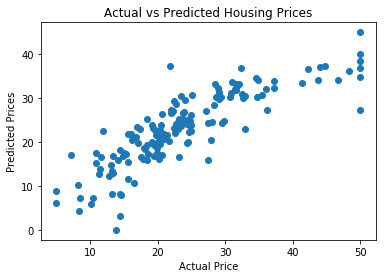

In [28]:
#ploter the scatter
plt.scatter(y_test,y_predict)
plt.xlabel('Actual Price')
plt.ylabel('Predicted Prices')
plt.title( "Actual vs Predicted Housing Prices")


We can see that there are some predict value is far from the real price, in the bottom-left you can see that our model predict the negative price which is not possible in a real-world.

In [29]:
#Let's check the model score of accuracy.
regressor.score(X_test, y_test)

0.7123604327171683

#model can predict accuracy 71%

In [31]:
#evaluate the prediction
print('MSE:', metrics.mean_squared_error(y_test, y_predict))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, y_predict)))

MSE: 28.551148765669453
RMSE: 5.343327499383642


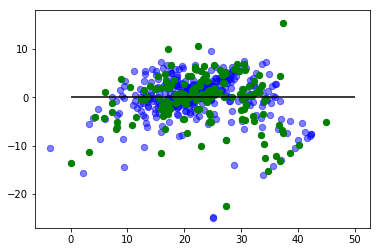

In [32]:
# plot
plt.scatter(regressor.predict(X_train),regressor.predict(X_train) - y_train,c='b',   # c= color blue
           s=40, alpha=0.5)
#  where   s : scalar or array_like, shape (n, ), optional
  ##  The marker size in points**2.
 ##   Default is ``rcParams['lines.markersize'] ** 2``

plt.scatter(regressor.predict(X_test),regressor.predict(X_test) - y_test, c='g', s=40)
plt.hlines(y=0,xmin=0,xmax=50)      # Horizontal line
plt.show()